# Logistic Regression 

In [1]:
#Creating Dummy Data set
from sklearn.datasets.samples_generator import make_blobs
X ,Y = make_blobs(n_samples = 200, centers = 2, n_features = 2, cluster_std = 5, random_state=11)

In [2]:
#No.of samples
m = 200

In [3]:
#Importing Libraries
import matplotlib.pyplot as plt
from pandas import DataFrame

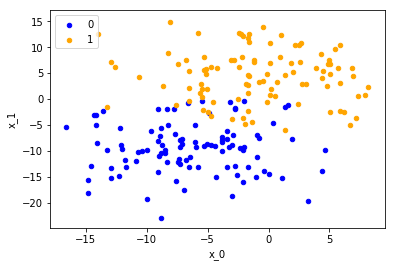

In [4]:
#Data visualization
df = DataFrame(dict(x = X[:,0], y = X[:,1], label = Y))
colors = {0:'blue',1:'orange'}
fig , ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',y='y',label=key, color= colors[key])
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.show()


# Logistic Model

In [5]:
import numpy as np
def sigmoid (z):
    return 1/(1+np.exp(-z))

In [6]:
def hx (w,X):
    z = np.array(w[0]+w[1]*np.array(X[:,0])+w[2]*np.array(X[:,1]))
    return sigmoid(z)

# Cost - Binary Cross Entrophy 

In [7]:
def cost(w,X,Y):
    y_pred = hx(w,X)
    return -1 * sum(Y*np.log(y_pred)+(1-Y)*np.log(1-y_pred))

# Gradient Descent

In [8]:
def grad(w, X, Y):
    y_pred = hx(w,X)
    g = [0]*3
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    g[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0])
    g[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1])
    return g

In [9]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev, X, Y))
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X, Y)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X, Y)[1]
        w2 = w_prev[2] - lr*grad(w_prev, X, Y)[2]
        w_new = [w0, w1, w2]
        print(w_new)
        print(cost(w_new, X, Y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 <pow(10,-6):
            return w_new
        
        if j>100: 
            return w_new
        j+=1

In [10]:
w=[1,1,1]

In [11]:
descent(w,w,0.0099)

[1, 1, 1]
126.96627984087802
[1.2539422898588644, -0.5512710240837779, 1.1843328109648115]
112.81815690482537
[1.2400289717256012, 1.3365539538600526, 1.3041857280167006]
168.5749357223354
[1.496038556709955, -0.26091766794801896, 1.498589948744304]
75.77036936925771
[1.552998152697941, 0.5805338886016641, 1.2059963033700993]
67.88063552779857
[1.7129970823802407, -0.12884219161477717, 0.9205552719943874]
49.631255078140065
[1.721522374547689, 0.8081464107255731, 0.784948881261807]
84.65164447415044
[1.9318934810214365, -0.5853214217947893, 0.9260582355386137]
137.02236299684375
[1.792209433897121, 2.259519445068961, 1.8717281361304319]
296.375960910099
[2.0717704014100984, 0.4671501798576154, 2.2375086018139254]
96.21982855549399
[2.2275891867070294, 0.17556932949773574, 1.7757719140648793]
66.93614685472798
[2.34635073219192, 0.10042351859759649, 1.3377088708014218]
47.88369966457564
[2.420814222298708, 0.2006649466226462, 0.9803329461122527]
35.74059972551982
[2.47109414690982, 0.15

[3.937085053426291, 0.6982103483166531, 0.9909832248890901]

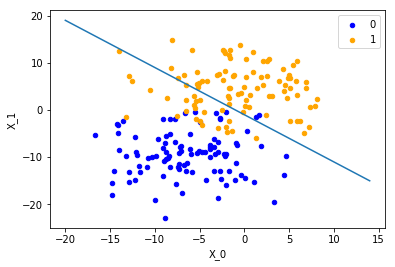

In [27]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-w[0]-w[1]*x)/w[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()